In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

house = load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
house_df.to_pickle('house_df.pkl')
house_df = pd.read_pickle('house_df.pkl')
house_df['PRICE'] = house.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

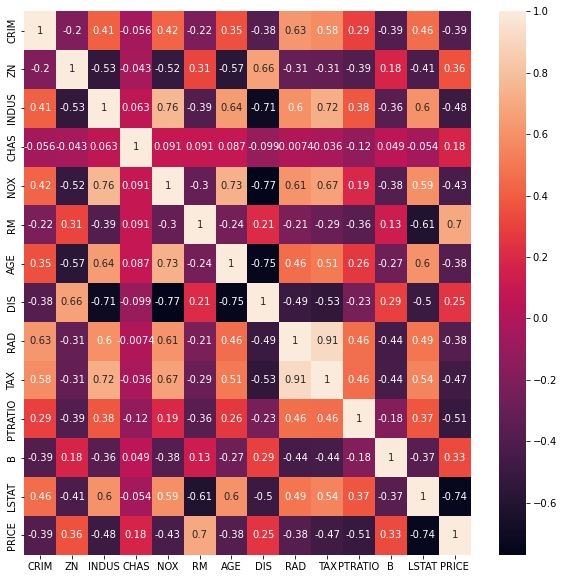

In [4]:
import seaborn as sns

df = house_df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(df, annot=True)

In [5]:
house_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
a = abs(df.PRICE)
a.sort_values(ascending=False)[1:9]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
Name: PRICE, dtype: float64

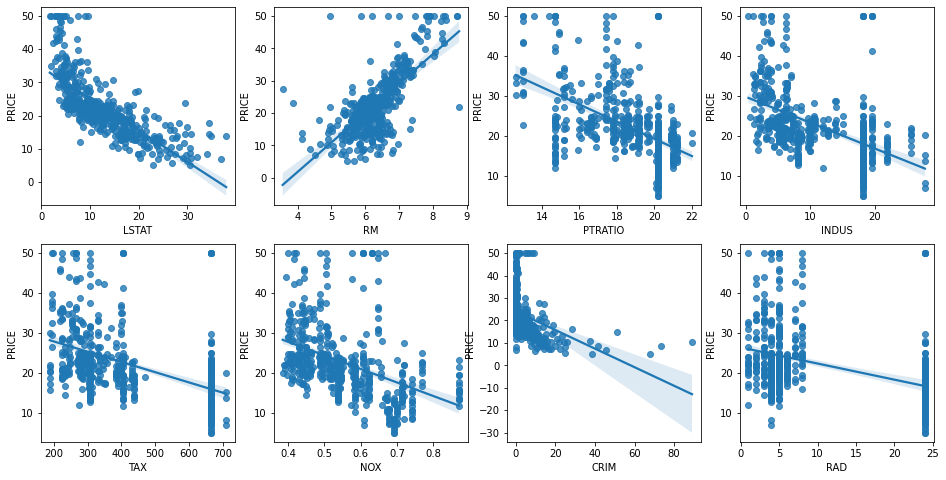

In [7]:
# 상위 8개 피처 상관관계 확인
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE',data=house_df, ax=axs[row][col])

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

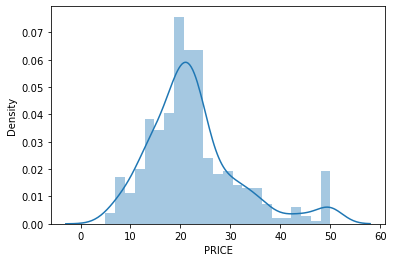

In [8]:
# 종속변수의 분포도

sns.distplot(house_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

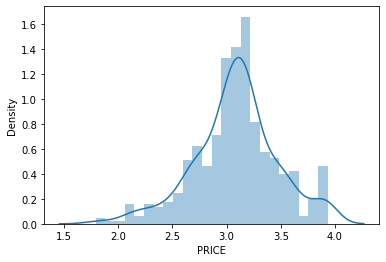

In [9]:
y_log = np.log1p(house_df['PRICE'])
sns.distplot(y_log)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = house_df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD']]
y = house_df[['PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE : {mse:.4f}, RMSE : {rmse:.4f}, R2 : {r2:.4f}')
print(f'절편값 : {np.round(lr.intercept_)}')
print(f'회귀 계수 값 : {lr.coef_}')

MSE : 24.3526, RMSE : 4.9348, R2 : 0.7343
절편값 : [36.]
회귀 계수 값 : [[ -0.56945327   3.33668178  -1.13719722   0.16129006  -0.01126136
  -10.32433655  -0.08113708   0.29009019]]


#### 과제_0926_1

상기 내용에 대하여 교차 검증을 수행하여 평가 결과를 출력하세요. (cv=5)

In [11]:
from sklearn.model_selection import cross_val_score



#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [12]:
X_data = house_df.drop(['PRICE'],axis=1,inplace=False)
y_target = house_df['PRICE']

In [23]:
# 릿지 회귀

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'개별 Negative MSE scores: {np.round(neg_mse_scores,3)}')
print(f'개별 RMSE scores : {np.round(rmse_scores,4)}')
print(f'평균 RMSE scores : {np.round(avg_rmse,4)}')

개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
개별 RMSE scores : [3.3796 4.9289 5.305  8.6371 5.3401]
평균 RMSE scores : 5.5182


In [14]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha}일 때 평균 RMSE : {np.round(avg_rmse,4)}')

alpha 0일 때 평균 RMSE : 5.8287
alpha 0.1일 때 평균 RMSE : 5.7885
alpha 1일 때 평균 RMSE : 5.6526
alpha 10일 때 평균 RMSE : 5.5182
alpha 100일 때 평균 RMSE : 5.3296


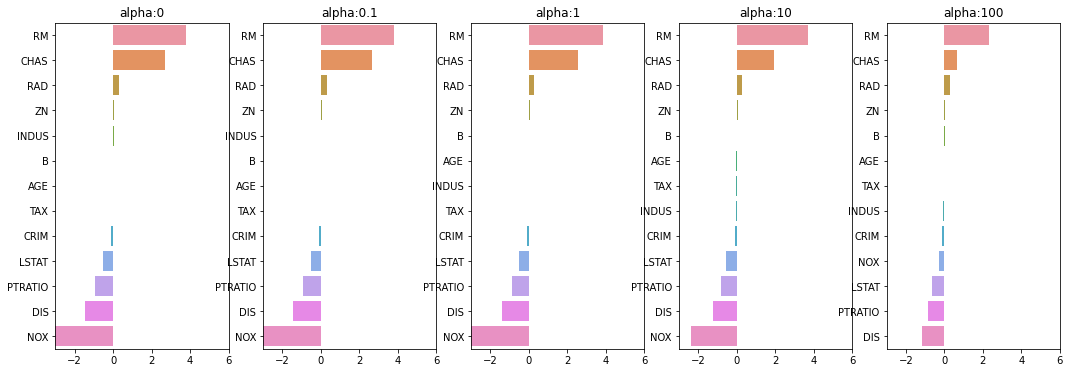

In [15]:
# alpha값이 증가하면 회귀 계수는 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(figsize=(18,6), nrows=1,ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [24]:
ridge_alphas = [0,0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [16]:
# 라쏘 회귀

from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
    for param in params:
        if model_name == 'Ridge' : model=Ridge(alpha=param)
        elif model_name == 'Lasso' : model=Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model=ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha {param}일 때 평균 RMSE : {np.round(avg_rmse,4)}')
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [17]:
lasso_alphas = [0.07, 0.1, 0.5, 1.3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_lasso_df

##### Lasso #####
alpha 0.07일 때 평균 RMSE : 5.6123
alpha 0.1일 때 평균 RMSE : 5.6151
alpha 0.5일 때 평균 RMSE : 5.6691
alpha 1.3일 때 평균 RMSE : 5.8451


,alpha0.07,alpha0.1,alpha0.5,alpha1.3
CRIM,-0.098193,-0.097894,-0.083289,-0.051638
ZN,0.049059,0.049211,0.049544,0.048850
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.789725,3.703202,2.498212,0.018113
AGE,-0.011706,-0.010037,0.003604,0.031350
DIS,-1.176583,-1.160538,-0.936605,-0.511309
RAD,0.270936,0.274707,0.277451,0.255433
TAX,-0.014290,-0.014570,-0.015442,-0.014981


#### 과제_0927_1
- 엘라스틱넷 모델을 적용하여 모델링 및 평가를 수행하세요
- alpha값 및 l1, l2 규제 비중 variation을 통하여 회귀 계수의 변화를 설명하세요

In [27]:
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n = y_target)

##### ElasticNet #####
alpha 0.07일 때 평균 RMSE : 5.5417
alpha 0.1일 때 평균 RMSE : 5.5259
alpha 0.5일 때 평균 RMSE : 5.4667
alpha 1일 때 평균 RMSE : 5.5969
alpha 3일 때 평균 RMSE : 6.0681


In [31]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
